<a href="https://colab.research.google.com/github/Somesh140/iNeauron_FSDS_Assignments/blob/main/Interview_based_assesment/python/Q8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [2]:
# data from question 
import requests
import json
from datetime import datetime
import csv

def download_data(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error downloading data. Status code:", response.status_code)
        return None

def format_airdate(airdate):
    formatted_date = datetime.strptime(airdate, '%Y-%m-%d').date()
    return formatted_date

def format_airtime(airtime):
    formatted_time = datetime.strptime(airtime, '%H:%M').strftime('%I:%M %p')
    return formatted_time

def extract_data(data):
    extracted_data = []
    show_data = data['_embedded']['episodes']
    for episode in show_data:
        episode_data = {}
        episode_data['id'] = episode['id']
        episode_data['url'] = episode['url']
        episode_data['name'] = episode['name']
        episode_data['season'] = episode['season']
        episode_data['number'] = episode['number']
        episode_data['type'] = episode['type']
        episode_data['airdate'] = format_airdate(episode['airdate'])
        episode_data['airtime'] = format_airtime(episode['airtime'])
        episode_data['runtime'] = episode['runtime']
        episode_data['average_rating'] = episode['rating']['average']
        episode_data['summary'] = episode['summary'].strip('<p>').strip('</p>')
        episode_data['medium_image_link'] = episode['image']['medium']
        episode_data['original_image_link'] = episode['image']['original']
        extracted_data.append(episode_data)
    return extracted_data

# Main program
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
data = download_data(api_link)
if data is not None:
    extracted_data = extract_data(data)

    # Save the data to a CSV file
    filename = "episodes.csv"
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=extracted_data[0].keys())
        writer.writeheader()
        writer.writerows(extracted_data)

    print("Data saved to", filename)
else:
    print("Data extraction failed.")


Data saved to episodes.csv


In [3]:
import pandas as pd

In [5]:
df=pd.read_csv("episodes.csv")

In [6]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


<Axes: xlabel='season'>

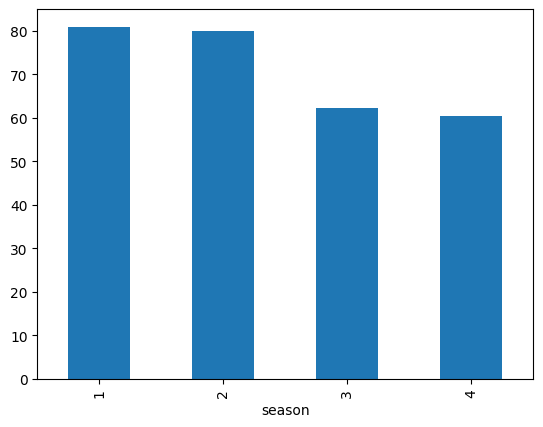

In [10]:
# Get all the overall ratings for each season and using plots compare the ratings for all the
# seasons, like season 1 ratings, season 2, and so on.
df.groupby("season")["average_rating"].sum().plot(kind="bar")

In [15]:
# Get all the episode names, whose average rating is more than 8 for every season
df[df["average_rating"]>8][["season","name"]]

,season,name
6,1,Trompe L'Oeil
8,1,The Well-Tempered Clavier
9,1,The Bicameral Mind
17,2,Kiksuya
18,2,Vanishing Point
19,2,The Passenger


In [19]:
# Get all the episode names that aired before May 2019
df[pd.to_datetime(df["airdate"])<pd.Timestamp("2019-05-01")]["name"]

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

In [26]:
# Get the episode name from each season with the highest and lowest rating
# Sort the DataFrame by season and average_rating
df_sorted = df.sort_values(['season', 'average_rating'])

# Group the DataFrame by season and find episodes with highest and lowest ratings
grouped_df = df_sorted.groupby('season')
episodes_with_highest_rating = grouped_df.last()
episodes_with_lowest_rating = grouped_df.first()

In [29]:
# Print the episode name from each season with the highest and lowest rating
print("Episodes with highest and lowest ratings per season:")
for season, episode in episodes_with_highest_rating.iterrows():
    print("Season", season, "- Episode with highest rating:", episode['name'])

for season, episode in episodes_with_lowest_rating.iterrows():
    print("Season", season, "- Episode with lowest rating:", episode['name'])

Episodes with highest and lowest ratings per season:
Season 1 - Episode with highest rating: The Bicameral Mind
Season 2 - Episode with highest rating: Kiksuya
Season 3 - Episode with highest rating: The Mother of Exiles
Season 4 - Episode with highest rating: Zhuangzi
Season 1 - Episode with lowest rating: The Stray
Season 2 - Episode with lowest rating: Akane No Mai
Season 3 - Episode with lowest rating: Decoherence
Season 4 - Episode with lowest rating: The Auguries
